# MBD41 – Project 
## Clara Maria Ferracini - 245735

In [1]:
import pandas as pd
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
comp_df = pd.read_excel('./2425MBD41_Project_Dataset.xlsx', sheet_name='COMPANY' )
inv_df = pd.read_excel('./2425MBD41_Project_Dataset.xlsx', sheet_name='INVESTMENT' )
acq_df = pd.read_excel('./2425MBD41_Project_Dataset.xlsx', sheet_name='ACQUISITION' )
emp_df = pd.read_excel('./2425MBD41_Project_Dataset.xlsx', sheet_name='EMPLOYEE' )

## Data Cleaning

Function to return missing values, duplicates, basic descriptive statistics and value counts for our dataframes.

In [3]:
def profile_dataframe(df, df_name):
    print(f"--- {df_name} Information ---")
    
    # Missing values
    print("\nMissing Values:")
    print(df.isnull().sum())
    
    # Duplicates
    print("\nDuplicate Rows:")
    print(df.duplicated().sum())
    
    # Basic descriptive statistics for numerical columns
    print("\nDescriptive Statistics (Numerical Columns):")
    print(df.describe())
    
    # Value counts for categorical columns
    print("\nValue Counts (Categorical Columns):")
    for col in df.select_dtypes(include=['object']).columns:
        print(f"\n{col} Value Counts:")
        print(df[col].value_counts())

### Company 

In [4]:
profile_dataframe(comp_df, 'COMPANY')

--- COMPANY Information ---

Missing Values:
COMPANY_NAME       0
CATEGORY           0
LOCATION           0
FOUNDED_ON         0
EXITED_ON          0
CLOSED_ON          0
REVENU_RANGE       0
EMPLOYEE_NUMBER    0
dtype: int64

Duplicate Rows:
0

Descriptive Statistics (Numerical Columns):
       COMPANY_NAME                                           CATEGORY  \
count          1000                                               1000   
unique         1000                                                977   
top         Twitter  Biotechnology, Health Care, Medical, Pharmaceu...   
freq              1                                                  5   

                                        LOCATION FOUNDED_ON EXITED_ON  \
count                                       1000       1000      1000   
unique                                       255        428       269   
top     San Francisco, California, United States       2012         —   
freq                                         17

In [5]:
comp_df.head()

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media","San Francisco, California, United States","Mar 21, 2006","Nov 7, 2013",—,$1B to $10B,1001-5000
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...","Hangzhou, Zhejiang, China",Oct 2014,—,—,$100M to $500M,5001-10000
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",2016,—,—,$1M to $10M,51-100
3,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China","Apr 4, 2010","Jul 9, 2018",—,$10B+,10001+
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",2018,—,—,$1M to $10M,1-10


In [6]:
# Replace '—' with NaN
comp_df.replace("—", np.nan, inplace=True)
# Use date format for date columns (FOUNDED_ON, EXITED_ON, CLOSED_ON)   
comp_df['FOUNDED_ON'] = pd.to_datetime(comp_df['FOUNDED_ON'])
comp_df['EXITED_ON'] = pd.to_datetime(comp_df['EXITED_ON'])
comp_df['CLOSED_ON'] = pd.to_datetime(comp_df['CLOSED_ON'])
comp_df.rename(columns={'REVENU_RANGE': 'REVENUE_RANGE'}, inplace=True)

print(comp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   COMPANY_NAME     1000 non-null   object        
 1   CATEGORY         996 non-null    object        
 2   LOCATION         1000 non-null   object        
 3   FOUNDED_ON       1000 non-null   datetime64[ns]
 4   EXITED_ON        322 non-null    datetime64[ns]
 5   CLOSED_ON        5 non-null      datetime64[ns]
 6   REVENUE_RANGE    954 non-null    object        
 7   EMPLOYEE_NUMBER  998 non-null    object        
dtypes: datetime64[ns](3), object(5)
memory usage: 62.6+ KB
None


#### Location

In [7]:
comp_df['LOCATION'].value_counts(normalize=True)

San Francisco, California, United States    0.173
New York, New York, United States           0.111
London, England, United Kingdom             0.058
Boston, Massachusetts, United States        0.025
Mountain View, California, United States    0.022
                                            ...  
Irvine, California, United States           0.001
Hanover, Maryland, United States            0.001
Valletta, NA - Malta, Malta                 0.001
Kormangala, Karnataka, India                0.001
Portland, Oregon, United States             0.001
Name: LOCATION, Length: 255, dtype: float64

Split the LOCATION column into three parts: City, State/Province, and Country and assign each part to a new column so we can separately analyse them 

In [8]:
location_split = comp_df['LOCATION'].str.split(',', n=2, expand=True)
comp_df['CITY'] = location_split[0].str.strip()
comp_df['STATE/PROVINCE'] = location_split[1].str.strip()
comp_df['COUNTRY'] = location_split[2].str.strip()

comp_df.drop(columns=['LOCATION'], inplace=True)

In [9]:
comp_df['COUNTRY'].describe()

count              1000
unique               46
top       United States
freq                660
Name: COUNTRY, dtype: object

In [10]:
comp_df['COUNTRY'].describe()

count              1000
unique               46
top       United States
freq                660
Name: COUNTRY, dtype: object

#### Employee Number 

In [11]:
comp_df['EMPLOYEE_NUMBER'].value_counts()

101-250       196
251-500       156
1001-5000     155
11-50         124
501-1000      119
51-100         95
10001+         95
5001-10000     33
1-10           25
Name: EMPLOYEE_NUMBER, dtype: int64

Function to create bigger categories in the column EMPLOYEE_NUMBER

In [12]:
def categorize_employee_number(employee_number):
    if employee_number in ["1-10", "11-50"]:
        return "Small"
    elif employee_number in ["51-100", "101-250", "251-500"]:
        return "Medium"
    elif employee_number in ["501-1000", "1001-5000"]:
        return "Large"
    elif employee_number in ["5001-10000", "10001+"]:
        return "Very Large"
    else:
        return "Unknown"

comp_df['EMPLOYEE_CATEGORY'] = comp_df['EMPLOYEE_NUMBER'].apply(categorize_employee_number)

print(comp_df['EMPLOYEE_CATEGORY'].value_counts())

Medium        447
Large         274
Small         149
Very Large    128
Unknown         2
Name: EMPLOYEE_CATEGORY, dtype: int64


In [13]:
unknown_employee_category = comp_df[comp_df['EMPLOYEE_CATEGORY'] == 'Unknown']
unknown_employee_category

,COMPANY_NAME,CATEGORY,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENUE_RANGE,EMPLOYEE_NUMBER,CITY,STATE/PROVINCE,COUNTRY,EMPLOYEE_CATEGORY
330,Manbang Group,"Apps, Freight Service, Logistics, Ride Sharing...",2017-11-01,NaT,NaT,NaN,NaN,Guiyang,Guizhou,China,Unknown
583,NYDIG,NaN,2017-01-01,NaT,NaT,NaN,NaN,New York,New York,United States,Unknown


In [14]:
comp_df = comp_df[comp_df['EMPLOYEE_CATEGORY'] != 'Unknown']
comp_df['EMPLOYEE_CATEGORY'].value_counts()

Medium        447
Large         274
Small         149
Very Large    128
Name: EMPLOYEE_CATEGORY, dtype: int64

In [15]:
comp_df['REVENUE_RANGE'].value_counts() 

$1M to $10M       230
$10M to $50M      216
$100M to $500M    166
$50M to $100M     103
$1B to $10B        77
Less than $1M      73
$500M to $1B       47
$10B+              42
Name: REVENUE_RANGE, dtype: int64

#### Revenue range

Function to to the same for REVENUE_RANGE

In [16]:
def categorize_revenue_range(revenue_range):
    if revenue_range in ["Less than $1M", "$1M to $10M"]:
        return "Small"
    elif revenue_range in ["$10M to $50M", "$50M to $100M"]:
        return "Medium"
    elif revenue_range in ["$100M to $500M", "$500M to $1B"]:
        return "Large"
    elif revenue_range in ["$1B to $10B", "$10B+"]:
        return "Very Large"
    else:
        return "Unknown"

# Apply the function to create a new column with broader categories
comp_df['REVENUE_CATEGORY'] = comp_df['REVENUE_RANGE'].apply(categorize_revenue_range)

# View the new category counts
print(comp_df['REVENUE_CATEGORY'].value_counts())

Medium        319
Small         303
Large         213
Very Large    119
Unknown        44
Name: REVENUE_CATEGORY, dtype: int64


In [17]:
#unknown_revenue_category = comp_df[comp_df['REVENUE_CATEGORY'] == 'Unknown']
#unknown_revenue_category

Checked the Unknown hat resulted form the function, it's 44 records but looking closely at the they are unknownn because the REVENUE_RANGE is Na so we drop those rows

In [18]:
# Drop rows with 'Unknown' employee category
comp_df = comp_df[comp_df['REVENUE_CATEGORY'] != 'Unknown']
comp_df['REVENUE_CATEGORY'].value_counts()

Medium        319
Small         303
Large         213
Very Large    119
Name: REVENUE_CATEGORY, dtype: int64

In [19]:
comp_df.drop(columns=['REVENUE_RANGE', 'EMPLOYEE_NUMBER'], inplace=True)
comp_df.head()

,COMPANY_NAME,CATEGORY,FOUNDED_ON,EXITED_ON,CLOSED_ON,CITY,STATE/PROVINCE,COUNTRY,EMPLOYEE_CATEGORY,REVENUE_CATEGORY
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media",2006-03-21,2013-11-07,NaT,San Francisco,California,United States,Large,Very Large
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...",2014-10-01,NaT,NaT,Hangzhou,Zhejiang,China,Very Large,Large
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...",2016-01-01,NaT,NaT,New York,New York,United States,Medium,Small
3,Xiaomi,"Consumer Electronics, Internet, Mobile",2010-04-04,2018-07-09,NaT,Beijing,Beijing,China,Very Large,Very Large
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...",2018-01-01,NaT,NaT,Brooklyn,New York,United States,Small,Small


In [20]:
comp_df['FOUNDED_ON'] = pd.to_datetime(comp_df['FOUNDED_ON'])
# Calculate the number of years since the company was founded
current_date = datetime.now()
comp_df['YEARS_SINCE_FOUNDED'] = comp_df['FOUNDED_ON'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)))

The Column STATUS will have info on whether the company is Closed, Exited or Active. 
We won't need the columns FOUNDED_ON, EXITED_ON and CLOSED_ON. 

In [21]:
def company_status(row):
    if pd.notnull(row['CLOSED_ON']):
        return 'Closed'
    elif pd.notnull(row['EXITED_ON']):
        return 'Exited'
    else:
        return 'Active'

comp_df['STATUS'] = comp_df.apply(company_status, axis=1)
comp_df.drop(columns=['FOUNDED_ON', 'EXITED_ON','CLOSED_ON'], inplace=True)


In [22]:
comp_df.head()

,COMPANY_NAME,CATEGORY,CITY,STATE/PROVINCE,COUNTRY,EMPLOYEE_CATEGORY,REVENUE_CATEGORY,YEARS_SINCE_FOUNDED,STATUS
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media",San Francisco,California,United States,Large,Very Large,18,Exited
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...",Hangzhou,Zhejiang,China,Very Large,Large,10,Active
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...",New York,New York,United States,Medium,Small,8,Active
3,Xiaomi,"Consumer Electronics, Internet, Mobile",Beijing,Beijing,China,Very Large,Very Large,14,Exited
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...",Brooklyn,New York,United States,Small,Small,6,Active


### Investment

In [23]:
profile_dataframe(inv_df, 'INVESTMENT')

--- INVESTMENT Information ---

Missing Values:
COMPANY_NAME        0
FUNDING_TYPE        0
MONEY_RAISED        0
ANNOUNCED_DATE      0
INVESTMENT_STAGE    0
dtype: int64

Duplicate Rows:
1167

Descriptive Statistics (Numerical Columns):
       COMPANY_NAME FUNDING_TYPE MONEY_RAISED ANNOUNCED_DATE INVESTMENT_STAGE
count          5937         5937         5937           5937             5937
unique          935           28         1210           2331                5
top           Tesla     Series A            —    Dec 8, 2020                —
freq             36          854         1028             25             1766

Value Counts (Categorical Columns):

COMPANY_NAME Value Counts:
Tesla              36
SpaceX             35
Uber               27
Ola                25
Lucid              23
                   ..
NEC Corporation     1
Orange              1
BP                  1
Skuad               1
Merck               1
Name: COMPANY_NAME, Length: 935, dtype: int64

FUNDING_TYPE Value

In [24]:
# Replace '—' with NaN
inv_df.replace("—", np.nan, inplace=True)
# Use date format for date columns (ANNOUNCED_DATE)
inv_df['ANNOUNCED_DATE'] = pd.to_datetime(inv_df['ANNOUNCED_DATE'])
print(inv_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   COMPANY_NAME      5937 non-null   object        
 1   FUNDING_TYPE      5937 non-null   object        
 2   MONEY_RAISED      4909 non-null   object        
 3   ANNOUNCED_DATE    5937 non-null   datetime64[ns]
 4   INVESTMENT_STAGE  4171 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 232.0+ KB
None


#### Money Raised variable

In [25]:
# Drop all rows where 'MONEY_RAISED' is NaN
inv_df.dropna(subset=['MONEY_RAISED'], inplace=True)
print(inv_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5936
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   COMPANY_NAME      4909 non-null   object        
 1   FUNDING_TYPE      4909 non-null   object        
 2   MONEY_RAISED      4909 non-null   object        
 3   ANNOUNCED_DATE    4909 non-null   datetime64[ns]
 4   INVESTMENT_STAGE  3663 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 230.1+ KB
None


In [26]:
inv_df['ANNOUNCED_DATE'].describe()     

/var/folders/zz/15nqyywn453_0_6jrq9zsqxw0000gp/T/ipykernel_11457/313498923.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  inv_df['ANNOUNCED_DATE'].describe()


count                    4909
unique                   2108
top       2020-12-10 00:00:00
freq                       24
first     1968-07-31 00:00:00
last      2021-05-19 00:00:00
Name: ANNOUNCED_DATE, dtype: object

In [27]:
inv_df['MONEY_RAISED'].value_counts()

$10,000,000     140
$50,000,000     139
$100,000,000    116
$20,000,000     103
$25,000,000      96
               ... 
$112,500,000      1
$15,211,719       1
$30,500,000       1
₹29,900,000       1
$3,510,000        1
Name: MONEY_RAISED, Length: 1209, dtype: int64

Since we notice that the prices are expressed in different currencies, we create a new column called CURRENCY (containing the characters that are not numeric of the column MONEY RAISED)

In [28]:
inv_df['CURRENCY'] = inv_df['MONEY_RAISED'].str.extract(r'(^[^\d\s]+)')  
cols = list(inv_df.columns)
last_column = cols.pop()  # Remove the last column
cols.insert(cols.index('MONEY_RAISED'), last_column)  # Insert it before the MONEY_RAISED column    
inv_df = inv_df[cols] 
inv_df.head()
inv_df['CURRENCY'].unique()

array(['$', '€', '¥', '₹', '£', 'CA$', 'A$', 'CN¥', 'R$', 'ZAR', 'SGD',
       '₩', 'CHF', 'MYR', 'SEK', 'RUB'], dtype=object)

In [29]:
# Remove non-numeric characters from the column PRICE so that it can be converted to a numeric data type    
inv_df['MONEY_RAISED'] = inv_df['MONEY_RAISED'].str.replace(r'^[^\d\s]+', '', regex=True).str.strip()
inv_df[['FUNDING_TYPE','CURRENCY','MONEY_RAISED']].head(10)

,FUNDING_TYPE,CURRENCY,MONEY_RAISED
0,Venture - Series Unknown,$,"250,000,000"
1,Series A,$,"50,000,000"
2,Seed,$,"6,000,000"
3,Seed,$,"10,000,000"
4,Seed,$,"1,000,000,000"
5,Venture - Series Unknown,$,"1,250,000,000"
6,Venture - Series Unknown,$,"1,530,000,000"
7,Venture - Series Unknown,$,"750,000,000"
8,Corporate Round,$,"250,000,000"
10,Series D,$,"425,000,000"


In [30]:
# Remove commas from the column MONEY_RAISED and convert it to a numeric data type
inv_df['MONEY_RAISED'] = inv_df['MONEY_RAISED'].str.replace(',', '', regex=True)
inv_df['MONEY_RAISED'] = inv_df['MONEY_RAISED'].astype(float)

print(inv_df['MONEY_RAISED'].head())

0    2.500000e+08
1    5.000000e+07
2    6.000000e+06
3    1.000000e+07
4    1.000000e+09
Name: MONEY_RAISED, dtype: float64


In [31]:
inv_df.head()

,COMPANY_NAME,FUNDING_TYPE,CURRENCY,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE
0,Pipe,Venture - Series Unknown,$,2.500000e+08,2021-03-31,NaN
1,Pipe,Series A,$,5.000000e+07,2021-03-09,Early Stage Venture
2,Pipe,Seed,$,6.000000e+06,2020-02-25,Seed
3,Pipe,Seed,$,1.000000e+07,2020-06-24,Seed
4,Epic Games,Seed,$,1.000000e+09,2021-04-13,Seed


### Acquisition

In [32]:
profile_dataframe(acq_df, 'ACQUISITION')

--- ACQUISITION Information ---

Missing Values:
COMPANY_NAME        0
ACQUIREE_NAME       0
ANNOUNCED_DATE      0
PRICE               0
ACQUISITION_TYPE    0
dtype: int64

Duplicate Rows:
1093

Descriptive Statistics (Numerical Columns):
       COMPANY_NAME ACQUIREE_NAME ANNOUNCED_DATE PRICE ACQUISITION_TYPE
count          5289          5289           5289  5289             5289
unique          497          4167           2691   560                6
top       Microsoft      Fastlane    May 6, 2021     —      Acquisition
freq            235             4             16  3949             4087

Value Counts (Categorical Columns):

COMPANY_NAME Value Counts:
Microsoft        235
Cisco            233
Google           230
Accenture        215
EQT              175
                ... 
Manbang Group      1
LEAD School        1
Ro                 1
Draper Esprit      1
Auth0              1
Name: COMPANY_NAME, Length: 497, dtype: int64

ACQUIREE_NAME Value Counts:
Fastlane                      

In [33]:
# Replace '—' with NaN
acq_df.replace("—", np.nan, inplace=True)
# Use date format for date columns (ANNOUNCED_DATE)
acq_df['ANNOUNCED_DATE'] = pd.to_datetime(acq_df['ANNOUNCED_DATE'])
print(acq_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5289 entries, 0 to 5288
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   COMPANY_NAME      5289 non-null   object        
 1   ACQUIREE_NAME     5289 non-null   object        
 2   ANNOUNCED_DATE    5289 non-null   datetime64[ns]
 3   PRICE             1340 non-null   object        
 4   ACQUISITION_TYPE  4449 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 206.7+ KB
None


#### Price 

In [34]:
acq_df['PRICE'].value_counts()

$100,000,000    35
$200,000,000    31
$50,000,000     27
$30,000,000     21
$20,000,000     19
                ..
£35,000,000      1
£30,000,000      1
£280,000,000     1
€105,000,000     1
$60,040,000      1
Name: PRICE, Length: 559, dtype: int64

Since we notice that the prices are expressed in different currencies, we create a new column called CURRENCY (containing the characters that are not numeric of the column PRICE)

In [35]:
acq_df['CURRENCY'] = acq_df['PRICE'].str.extract(r'(^[^\d\s]+)') 
cols = list(acq_df.columns)
last_column = cols.pop()  # Remove the last column
cols.insert(cols.index('PRICE'), last_column)  # Insert it before PRICE
acq_df = acq_df[cols] 
acq_df.head()
acq_df['CURRENCY'].unique()

array(['$', nan, '€', '£', 'A$', 'CA$', 'DKK', 'CHF', 'RUB', '₹', 'CN¥',
       'R$', 'SEK'], dtype=object)

In [36]:
# Remove non-numeric characters from the column PRICE so that it can be converted to a numeric data type    
acq_df['PRICE'] = acq_df['PRICE'].str.replace(r'^[^\d\s]+', '', regex=True).str.strip()
acq_df.head(10)

,COMPANY_NAME,ACQUIREE_NAME,ANNOUNCED_DATE,CURRENCY,PRICE,ACQUISITION_TYPE
0,IBM,Turbonomic,2021-04-29,$,"2,000,000,000",Acquisition
1,IBM,myInvenio,2021-04-15,NaN,NaN,Acquisition
2,IBM,Taos Mountain,2021-01-14,NaN,NaN,Acquisition
3,IBM,Cloudant,2014-02-24,NaN,NaN,Acquisition
4,IBM,TruQua,2020-11-16,NaN,NaN,Acquisition
5,IBM,Nordcloud,2020-12-21,NaN,NaN,Acquisition
6,IBM,Instana,2020-11-18,NaN,NaN,Acquisition
7,IBM,7Summits,2021-01-11,NaN,NaN,Acquisition
8,IBM,Expertus Technologies,2020-12-15,NaN,NaN,Acquisition
9,IBM,NetObjects,1997-03-19,NaN,NaN,Acquisition


In [37]:
# Remove commas from the column PRICE and convert it to a numeric data type
acq_df['PRICE'] = acq_df['PRICE'].str.replace(',', '', regex=True)
acq_df['PRICE'] = acq_df['PRICE'].astype(float)

In [38]:
acq_df[acq_df['PRICE'].notna()].head()

,COMPANY_NAME,ACQUIREE_NAME,ANNOUNCED_DATE,CURRENCY,PRICE,ACQUISITION_TYPE
0,IBM,Turbonomic,2021-04-29,$,2.000000e+09,Acquisition
10,IBM,CommQuest Services,1998-04-30,$,2.000000e+08,Acquisition
13,IBM,Micromuse,2005-12-21,$,8.650000e+08,Acquisition
19,IBM,Netezza,2010-09-20,$,1.800000e+09,Acquisition
36,IBM,Tivoli Systems,1996-02-01,$,7.430000e+08,Acquisition


In [39]:
acq_df = acq_df.sort_values(by='PRICE', ascending=False)
acq_df.head(10)

,COMPANY_NAME,ACQUIREE_NAME,ANNOUNCED_DATE,CURRENCY,PRICE,ACQUISITION_TYPE
1450,Pfizer,Warner-Lambert,2000-02-07,$,9.000000e+10,Acquisition
3701,The Walt Disney Company,21st Century Fox,2017-12-14,$,7.130000e+10,Acquisition
1464,Pfizer,Wyeth Nutritionals,2009-01-23,$,6.800000e+10,Acquisition
4855,Charter Communications,Spectrum,2015-05-26,$,5.600000e+10,Acquisition
4056,Medtronic,Covidien,2014-06-15,$,4.290000e+10,Acquisition
4302,NVIDIA,Arm Holdings,2020-09-13,$,4.000000e+10,Acquisition
50,IBM,Red Hat,2018-10-28,$,3.400000e+10,Acquisition
2957,SoftBank,Arm Holdings,2016-07-18,£,2.430000e+10,Acquisition
3335,Visa,Visa Europe,2015-10-30,$,2.330000e+10,Acquisition
3287,Liberty Global,Virgin Media,2013-02-05,$,2.330000e+10,Acquisition


### Employee

In [40]:
profile_dataframe(emp_df, 'EMPLOYEE')

--- EMPLOYEE Information ---

Missing Values:
EMPLOYEE_MD5            0
JOB_TITLES              0
COMPANY_NAME            0
ATTENDED_SCHOOLS    14118
dtype: int64

Duplicate Rows:
0

Descriptive Statistics (Numerical Columns):
                            EMPLOYEE_MD5         JOB_TITLES COMPANY_NAME  \
count                              20702              20702        20702   
unique                             20702              12308          964   
top     aac4a9fe0edc50a77072eae64578a892  Software Engineer    Microsoft   
freq                                   1                510         1756   

            ATTENDED_SCHOOLS  
count                   6584  
unique                  2973  
top      Stanford University  
freq                     159  

Value Counts (Categorical Columns):

EMPLOYEE_MD5 Value Counts:
aac4a9fe0edc50a77072eae64578a892    1
fc2f146e25e1a1513d160d73a35408b4    1
d7cf814f250a839ae2df6892545a2b25    1
b5206d5b1e7e2031d59907f2a8b00428    1
8e86ca18f592159ee088

In [41]:
# The column 'EMPLOYEE_MD5' does not provide any useful information
emp_df.drop(columns=['EMPLOYEE_MD5'], inplace=True)
emp_df.head()

,JOB_TITLES,COMPANY_NAME,ATTENDED_SCHOOLS
0,CEO,Twitter,NaN
1,Co-Founder,Twitter,Northeastern University University of Massach...
2,Team Member,Twitter,NaN
3,General Counsel,Twitter,Cornell University New York University School...
4,"VP, Trust & Safety",Twitter,NaN


# Questions

## 1. How many companies have received at least one round of investment?

In [42]:
# Count unique companies in the INVESTMENT worksheet 
companies_with_investment = inv_df['COMPANY_NAME'].nunique()
print(f"Number of companies with at least one round of investment: {companies_with_investment}")

Number of companies with at least one round of investment: 926


## 2. What are the distributions of the current status of these companies?

In [43]:
status_distribution = comp_df['STATUS'].value_counts()
print("Distribution of current statuses of companies:")
print(status_distribution)

Distribution of current statuses of companies:
Active    629
Exited    320
Closed      5
Name: STATUS, dtype: int64


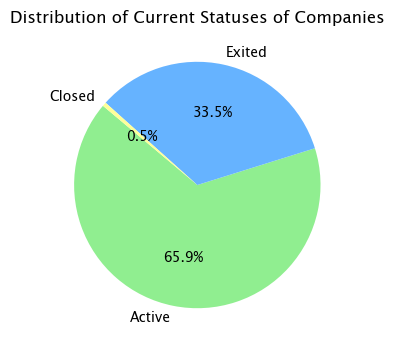

In [44]:
plt.figure(figsize=(4, 4))
status_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#90ee90','#66b3ff','#ffff99'])
plt.title('Distribution of Current Statuses of Companies')
plt.ylabel('')
plt.show()

## 3. On average, how much money has each company received at the Series A round?

In [45]:
inv_df['CURRENCY'].value_counts(normalize=True)[:5]

$      0.885720
€      0.036871
£      0.032797
₹      0.020167
CA$    0.007130
Name: CURRENCY, dtype: float64

Since we can see that some currencies only appear in less than 1% of the records, we will not consider them and we just convert to dollars the records in MONEY_RAISED that are in the currencies that appear most times in our dataset.

In [46]:
top_4_currencies = ['$','€','£','₹']

filtered_currencies = inv_df[inv_df['CURRENCY'].isin(top_4_currencies)]
filtered_currencies.head()


,COMPANY_NAME,FUNDING_TYPE,CURRENCY,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE
0,Pipe,Venture - Series Unknown,$,2.500000e+08,2021-03-31,NaN
1,Pipe,Series A,$,5.000000e+07,2021-03-09,Early Stage Venture
2,Pipe,Seed,$,6.000000e+06,2020-02-25,Seed
3,Pipe,Seed,$,1.000000e+07,2020-06-24,Seed
4,Epic Games,Seed,$,1.000000e+09,2021-04-13,Seed


In [47]:
filtered_data = filtered_currencies[['FUNDING_TYPE', 'CURRENCY', 'MONEY_RAISED']]

currency_to_usd = {
    '$': 1,           # USD to USD
    '€': 1.09,        # Euro to USD
    '£': 1.22,        # GBP to USD
    '₹': 0.012        # INR to USD
}

def convert_to_usd(row, currency_col, money_col):
    currency = row[currency_col]
    money_raised = row[money_col]
    return money_raised * currency_to_usd[currency]

inv_df['MONEY_RAISED_IN_USD'] = filtered_currencies.apply(
    convert_to_usd, 
    axis=1,
    args=('CURRENCY', 'MONEY_RAISED'))

inv_df['MONEY_RAISED_IN_USD'].astype(float) 
inv_df['MONEY_RAISED_IN_USD'].describe()

count    4.789000e+03
mean     1.290490e+08
std      5.121625e+08
min      6.500000e+03
25%      5.000000e+06
50%      2.000000e+07
75%      7.500000e+07
max      1.400000e+10
Name: MONEY_RAISED_IN_USD, dtype: float64

In [48]:
series_a_data = filtered_currencies[filtered_currencies['FUNDING_TYPE'] == 'Series A']

In [49]:
average_money_raised = series_a_data.groupby('CURRENCY')['MONEY_RAISED'].mean()

for currency, avg in average_money_raised.items():
    print(f"Average money raised in Series A round for {currency}: {avg:,.2f}")

Average money raised in Series A round for $: 19,020,263.08
Average money raised in Series A round for £: 10,800,988.79
Average money raised in Series A round for €: 13,466,666.63
Average money raised in Series A round for ₹: 351,000,000.00


In USD

In [50]:
average_money_raised_in_usd = inv_df[inv_df['FUNDING_TYPE']=='Series A']['MONEY_RAISED_IN_USD'].mean()
print(f"Average money raised in Series A in dollars: ${average_money_raised_in_usd:,.2f}")

Average money raised in Series A in dollars: $18,643,858.92


## 4. Which company has the largest number of acquisitions?

Since we have a record for every acquisition, we just need to take the company that have the highest value_counts in the dataframe.

In [51]:
acq_df['COMPANY_NAME'].value_counts()[:3]

Microsoft    235
Cisco        233
Google       230
Name: COMPANY_NAME, dtype: int64

The runner-up is very close!

In [52]:
acquisitions_count = acq_df['COMPANY_NAME'].value_counts()
top_acquirer = acquisitions_count.idxmax()
top_acquisition_count = acquisitions_count.max()
print(f"Company with the largest number of acquisitions: {top_acquirer} ({top_acquisition_count} acquisitions)")

Company with the largest number of acquisitions: Microsoft (235 acquisitions)


## 5. Which of these companies have CEOs graduated from a Ivy League school?

In [53]:
ivy_league_schools = ['Brown', 'Columbia', 'Cornell', 'Dartmouth', 'Harvard', 'University of Pennsylvania', 'Princeton','Yale']
# Filter rows to obtain new dataframe where the JOB_TITLES column contains 'CEO' or 'Chief Executive Officer'
ceos = emp_df[emp_df['JOB_TITLES'].str.contains('CEO|Chief Executive Officer')]
# Filter rows to obtain new dataframe where the ATTENDED_SCHOOLS column contains any of the ivy league schools
ceos_ivy_schools = ceos[ceos['ATTENDED_SCHOOLS'].apply(lambda schools: any(ivy_school in str(schools) for ivy_school in ivy_league_schools))]
companies_with_top_school_ceos = ceos_ivy_schools['COMPANY_NAME'].unique()
print("Companies with CEOs who graduated from a top school:")
print(companies_with_top_school_ceos)

Companies with CEOs who graduated from a top school:
['Google' 'Berkshire Hathaway' 'Moderna Therapeutics' 'Snapdeal'
 'Voyager Space Holdings' 'Amazon Web Services' 'Thumbtack' 'Facebook'
 'CARS24' 'Etsy' 'Acorns' 'Pave' 'Eat Just, Inc.' 'InMobi' '1mg'
 'Microsoft' 'Uber' 'Figma' 'Tesla' 'Ripple' 'Warby Parker' 'Compass'
 '23andMe' 'Cyble' 'SoFi' 'Zuora' 'Upstart' 'Cloudflare'
 'Incredible Health' 'PubMatic' 'Citigroup' 'Silver Lake' 'Expanse'
 'Wayfair' 'Lyra Health' 'Upwork' 'Workday' 'Groupon' 'Butterfly Network'
 'Teladoc' 'Bread' 'Vox Media' 'Chooch AI' 'Liberty Global' 'Cadre'
 'Finix Payments' 'Honor' 'Mulberry Platform' 'Landit' 'Minerva'
 'Morgan Stanley' 'AppsFlyer' 'Investcorp' 'Funding Societies'
 'MercadoLibre' 'MediaMath' 'Coupa Software' 'Roche' 'OneWeb' 'Hims'
 'SmartAsset' 'Omada Health' 'Comcast' 'Outreach' 'Transfix' 'Foursquare'
 'Beeswax' 'CareAcademy' 'Vonage' 'Verbit' 'View' 'Somatus'
 'T. Rowe Price' 'Parallel Domain' 'OZY Media' 'SecurityScorecard' 'Rover'
 'M

## 6. 10 Companies that Raised the Highest Amount of Money?

In [54]:
grouped_df = inv_df.groupby('COMPANY_NAME')['MONEY_RAISED_IN_USD'].sum().reset_index()
# Sort the companies by the total amount raised in descending order and select the top 10
top_10_companies = grouped_df.sort_values(by='MONEY_RAISED_IN_USD', ascending=False).head(10)
company_names = top_10_companies['COMPANY_NAME'].values 

print(f"The 10 companies that raised the highest amount of money are: {company_names}")

The 10 companies that raised the highest amount of money are: ['Reliance Jio' 'Tesla' 'Facebook' 'Ant Group' 'Meituan' 'Uber' 'Didi'
 'BP' 'Sberbank' 'Siemens']


<Figure size 1200x600 with 0 Axes>

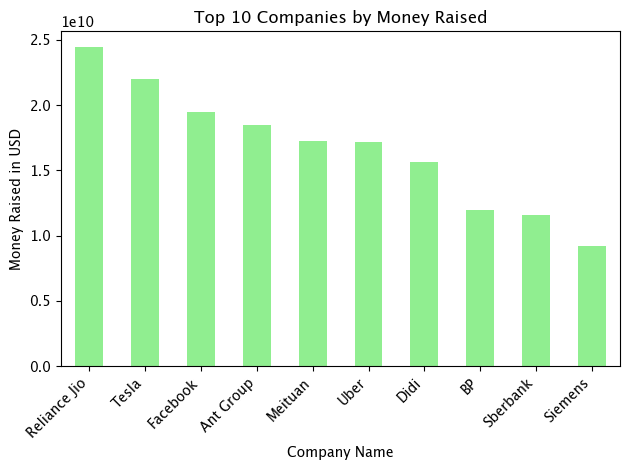

In [82]:
# Create a bar plot to show the ten companies that raised the most money and the amount they raised
plt.figure(figsize=(12, 6))
top_10_companies.plot(kind='bar', x='COMPANY_NAME', y='MONEY_RAISED_IN_USD', legend=False, color='#90ee90')
plt.title('Top 10 Companies by Money Raised')
plt.xlabel('Company Name')
plt.ylabel('Money Raised in USD')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 7. Most Common Categories of Companies 

In [56]:
# Create a series of lists where each list contains the sector categories for a company
all_sectors = comp_df['CATEGORY'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
# Create a big list of all sectors cateogies together 
flat_sectors = [sector for sublist in all_sectors for sector in sublist]
sector_counts = pd.Series(flat_sectors).value_counts()
print(sector_counts[:10])

Software                  289
FinTech                   146
Financial Services        143
SaaS                      142
Information Technology    134
Internet                  129
E-Commerce                119
Enterprise Software       114
Finance                    99
Health Care                90
dtype: int64


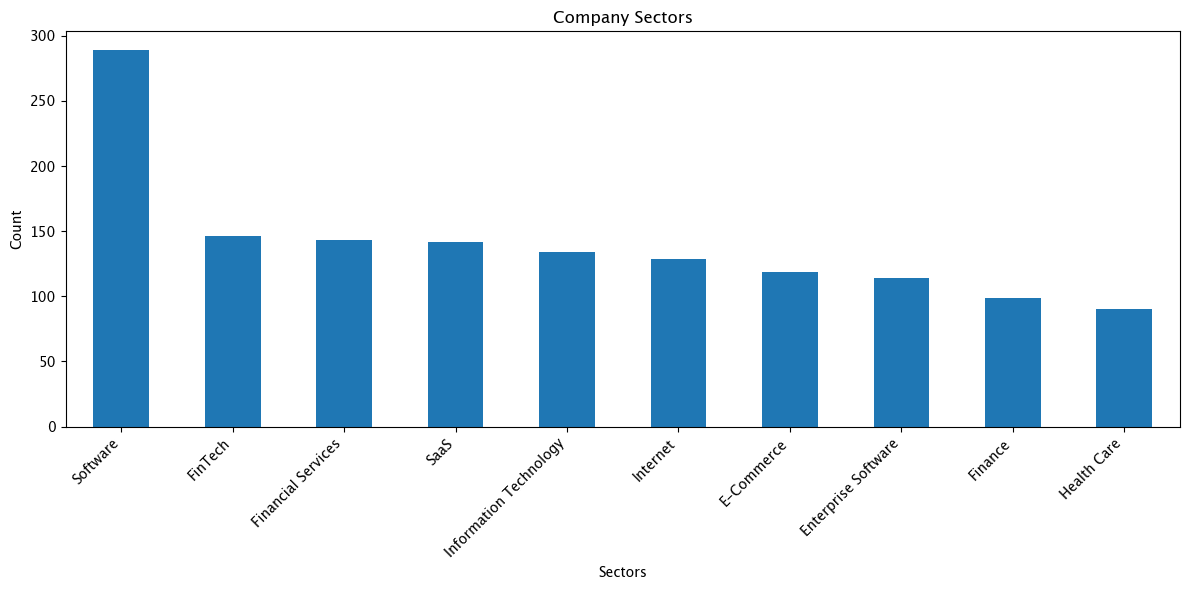

In [57]:
sector_counts = sector_counts[:10]
plt.figure(figsize=(12, 6))
sector_counts.plot(kind='bar')
plt.title('Company Sectors')
plt.xlabel('Sectors')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 8. Where are the companies with the highest revenue range located? 

<AxesSubplot:>

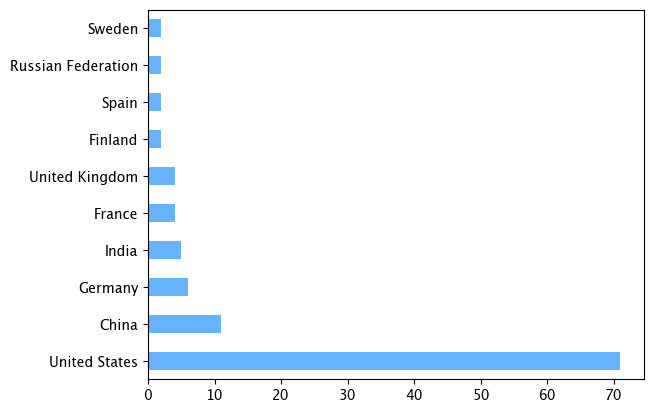

In [84]:
comp_df[comp_df['REVENUE_CATEGORY']=='Very Large']['COUNTRY'].value_counts().head(10).plot.barh(color='#66b3ff')

<AxesSubplot:>

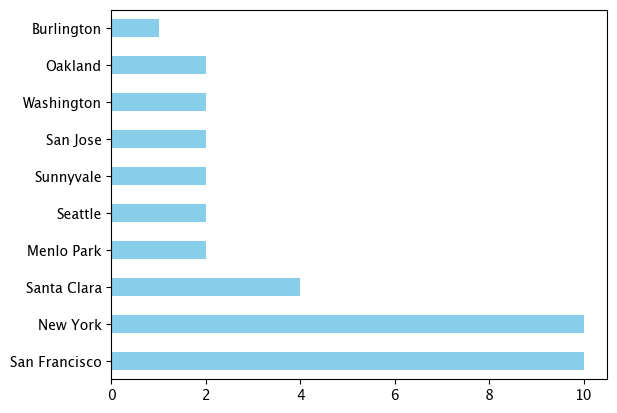

In [83]:
comp_df[(comp_df['REVENUE_CATEGORY'] == 'Very Large') & (comp_df['COUNTRY'] == 'United States')]['CITY'].value_counts().head(10).plot.barh(color='skyblue') 

## 9. Average, Min, Max and Total Prices paid for Acquisitions

In [60]:
acq_df['CURRENCY'].value_counts(normalize=True)#[:5]

$      0.870149
€      0.067164
£      0.025373
CA$    0.009701
CN¥    0.009701
₹      0.005970
RUB    0.004478
A$     0.002985
CHF    0.001493
R$     0.001493
DKK    0.000746
SEK    0.000746
Name: CURRENCY, dtype: float64

We follow the same procedure that we used for the MONEY_RAISED. Here there are only three currencies appear in more than 1% or the records so we will only coonsider three currencies.

In [61]:
top_currencies = ['$','€','£']

filtered_currencies = acq_df[acq_df['CURRENCY'].isin(top_currencies)]
filtered_currencies.head()

,COMPANY_NAME,ACQUIREE_NAME,ANNOUNCED_DATE,CURRENCY,PRICE,ACQUISITION_TYPE
1450,Pfizer,Warner-Lambert,2000-02-07,$,9.000000e+10,Acquisition
3701,The Walt Disney Company,21st Century Fox,2017-12-14,$,7.130000e+10,Acquisition
1464,Pfizer,Wyeth Nutritionals,2009-01-23,$,6.800000e+10,Acquisition
4855,Charter Communications,Spectrum,2015-05-26,$,5.600000e+10,Acquisition
4056,Medtronic,Covidien,2014-06-15,$,4.290000e+10,Acquisition


In [62]:
acq_df['PRICE_IN_USD'] = filtered_currencies.apply(
    convert_to_usd, 
    axis=1,
    args=('CURRENCY', 'PRICE'))

acq_df['PRICE_IN_USD'].astype(float) 
acq_df['PRICE_IN_USD'].describe()

count    1.290000e+03
mean     1.410204e+09
std      5.184670e+09
min      2.500000e+04
25%      5.996250e+07
50%      2.000000e+08
75%      7.215700e+08
max      9.000000e+10
Name: PRICE_IN_USD, dtype: float64

In [63]:
print(f"The total amount spent on acquisitions in USD is: ${acq_df['PRICE_IN_USD'].sum():,.2f}")
print(f"The average amount spent on acquisitions in USD is: ${acq_df['PRICE_IN_USD'].mean():,.2f}")
print(f"The minimum amount spent on an acquisition in USD is: ${acq_df['PRICE_IN_USD'].min():,.2f}")
print(f"The maximum amount spent on an acquisition in USD is: ${acq_df['PRICE_IN_USD'].max():,.2f}")

The total amount spent on acquisitions in USD is: $1,819,162,978,498.00
The average amount spent on acquisitions in USD is: $1,410,203,859.30
The minimum amount spent on an acquisition in USD is: $25,000.00
The maximum amount spent on an acquisition in USD is: $90,000,000,000.00


## 10. Is there a period in time where most expensive acquisition were made?

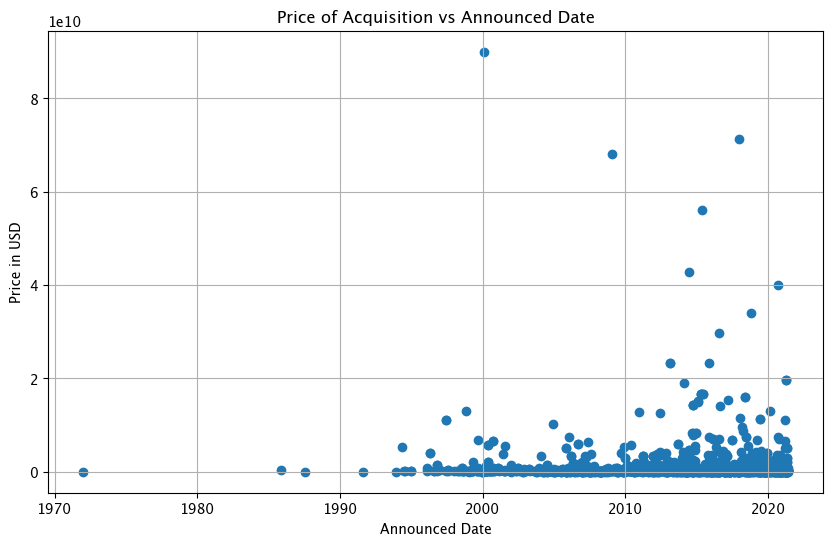

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(acq_df['ANNOUNCED_DATE'], acq_df['PRICE_IN_USD'], marker='o')
plt.title('Price of Acquisition vs Announced Date')
plt.xlabel('Announced Date')
plt.ylabel('Price in USD')
plt.grid(True)
plt.show()

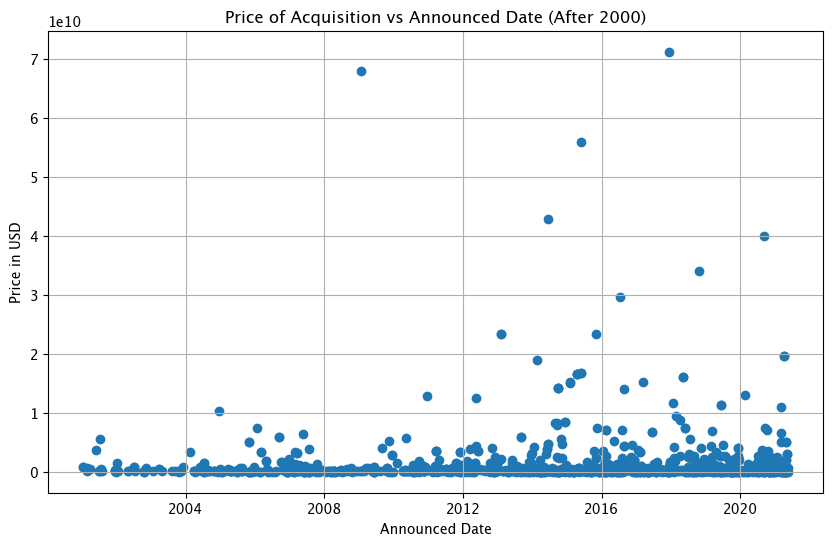

In [65]:
acq_df_after_2000 = acq_df[acq_df['ANNOUNCED_DATE'].dt.year > 2000]

plt.figure(figsize=(10, 6))
plt.scatter(acq_df_after_2000['ANNOUNCED_DATE'], acq_df_after_2000['PRICE_IN_USD'], marker='o')
plt.title('Price of Acquisition vs Announced Date (After 2000)')
plt.xlabel('Announced Date')
plt.ylabel('Price in USD')
plt.grid(True)
plt.show()

It looks like most of the acquisitions were made in the period between 2014 and 2018. However, the most expansive acquisition was made in the year 2000.

In [66]:
acquisitions_2000 = acq_df[acq_df['ANNOUNCED_DATE'].dt.year == 2000]
highest_price_2000 = acquisitions_2000.loc[acquisitions_2000['PRICE_IN_USD'].idxmax()]

print("The most expansive acquisition is:")
print(highest_price_2000)

The most expansive acquisition is:
COMPANY_NAME                     Pfizer
ACQUIREE_NAME            Warner-Lambert
ANNOUNCED_DATE      2000-02-07 00:00:00
CURRENCY                              $
PRICE                     90000000000.0
ACQUISITION_TYPE            Acquisition
PRICE_IN_USD              90000000000.0
Name: 1450, dtype: object


## 11. What is the percentage of data scientists in these companies? 

In [67]:
num_employees = emp_df.shape[0]
print(f"Number of employees in our dataframe: {num_employees}")

Number of employees in our dataframe: 20702


See all the Job Titles that contain "Data Scientist" or "Data Science" in the name 

In [68]:
emp_df[emp_df['JOB_TITLES'].str.contains('Data Scientist|Data Science', na=False)]['JOB_TITLES'].value_counts()

Data Scientist                                     76
Senior Data Scientist                              30
Head of Data Science                                7
Director of Data Science                            7
Chief Data Scientist                                6
                                                   ..
Senior Data Scientist, Applied Machine Learning     1
AI Senior Data Scientist                            1
Data Scientist II                                   1
Principal Data Science Manager                      1
Head of Data Science, Asia Pacific                  1
Name: JOB_TITLES, Length: 111, dtype: int64

In [69]:
# Sum them all
data_scientists = emp_df['JOB_TITLES'].str.contains('Data Scientist|Data Science').sum()
print(f"Number of Data Scientists in the companies : {data_scientists}")     

Number of Data Scientists in the companies : 250


In [70]:
percentage_data_scientists = (data_scientists / num_employees) * 100
print(f"The percentage of Data Scientists in the dataset is {percentage_data_scientists:.2f}%")

The percentage of Data Scientists in the dataset is 1.21%


## 12. Which schools did these data scientists attend?

In [71]:
data_scientists = emp_df[emp_df['JOB_TITLES'].str.contains('Data Scientist|Data Science')]
data_science_schools  = data_scientists['ATTENDED_SCHOOLS'].value_counts()[:5]
print(data_science_schools)    

 Northwestern University                            3
 Stanford University                                2
 Yale University                                    2
 Carnegie Mellon University University of Mumbai    1
 University of Exeter                               1
Name: ATTENDED_SCHOOLS, dtype: int64


## 13. Top 10 Schools of Employees in Tech Companies

In [72]:
# Join comp_df and emp_df on 'COMPANY_NAME'
merged_df = pd.merge(comp_df, emp_df, on='COMPANY_NAME', how='inner')
merged_df.head()

,COMPANY_NAME,CATEGORY,CITY,STATE/PROVINCE,COUNTRY,EMPLOYEE_CATEGORY,REVENUE_CATEGORY,YEARS_SINCE_FOUNDED,STATUS,JOB_TITLES,ATTENDED_SCHOOLS
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media",San Francisco,California,United States,Large,Very Large,18,Exited,CEO,NaN
1,Twitter,"Blogging Platforms, Messaging, SMS, Social Media",San Francisco,California,United States,Large,Very Large,18,Exited,Co-Founder,Northeastern University University of Massach...
2,Twitter,"Blogging Platforms, Messaging, SMS, Social Media",San Francisco,California,United States,Large,Very Large,18,Exited,Team Member,NaN
3,Twitter,"Blogging Platforms, Messaging, SMS, Social Media",San Francisco,California,United States,Large,Very Large,18,Exited,General Counsel,Cornell University New York University School...
4,Twitter,"Blogging Platforms, Messaging, SMS, Social Media",San Francisco,California,United States,Large,Very Large,18,Exited,"VP, Trust & Safety",NaN


In [73]:
print(sector_counts[:20])

Software                  289
FinTech                   146
Financial Services        143
SaaS                      142
Information Technology    134
Internet                  129
E-Commerce                119
Enterprise Software       114
Finance                    99
Health Care                90
dtype: int64


In [74]:
tech_companies = merged_df[merged_df['CATEGORY'].notna() & merged_df['CATEGORY'].str.contains('Software|Artificial Intelligence|Machine Learning|Cloud Computing')]
tech_comapny_empl_shools = tech_companies['ATTENDED_SCHOOLS'].value_counts()[:10]
print(tech_comapny_empl_shools)

 Stanford University                             71
 Massachusetts Institute of Technology - MIT     55
 University of California, Berkeley              53
 Carnegie Mellon University                      36
 University of Washington                        34
 Harvard University                              29
 University of California, Los Angeles (UCLA)    23
 University of Southern California               21
 Cornell University                              21
 University of Michigan                          21
Name: ATTENDED_SCHOOLS, dtype: int64


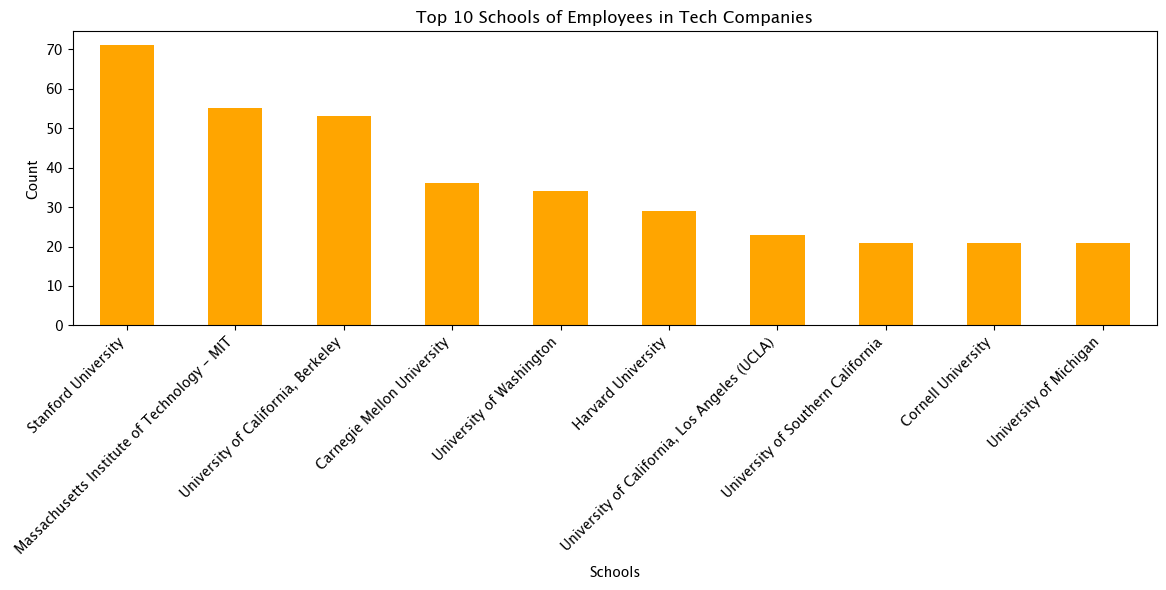

In [85]:
plt.figure(figsize=(12, 6))
tech_comapny_empl_shools.plot(kind='bar', color='orange')
plt.title('Top 10 Schools of Employees in Tech Companies')  
plt.xlabel('Schools')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 14. Percentage of employees who went to Ivy League Schools at Microsoft and Google 

In [76]:
# Calculate the percentage of Google employees who went to Ivy League schools
google_employees = emp_df[emp_df['COMPANY_NAME'] == 'Google']
google_ivy_league_employees = google_employees[google_employees['ATTENDED_SCHOOLS'].apply(lambda schools: any(ivy_school in str(schools) for ivy_school in ivy_league_schools))]

total_google_employees = google_employees.shape[0]
total_google_ivy_league_employees = google_ivy_league_employees.shape[0]
percentage_google_ivy_league = (total_google_ivy_league_employees / total_google_employees) * 100

print(f"Percentage of Google employees who went to Ivy League schools: {percentage_google_ivy_league:.2f}%")

# Calculate the percentage of Microsoft employees who went to Ivy League schools
microsoft_employees = emp_df[emp_df['COMPANY_NAME'] == 'Microsoft']
microsoft_ivy_league_employees = microsoft_employees[microsoft_employees['ATTENDED_SCHOOLS'].apply(lambda schools: any(ivy_school in str(schools) for ivy_school in ivy_league_schools))]

total_microsoft_employees = microsoft_employees.shape[0]
total_microsoft_ivy_league_employees = microsoft_ivy_league_employees.shape[0]
percentage_microsoft_ivy_league = (total_microsoft_ivy_league_employees / total_microsoft_employees) * 100

print(f"Percentage of Microsoft employees who went to Ivy League schools: {percentage_microsoft_ivy_league:.2f}%")

Percentage of Google employees who went to Ivy League schools: 4.94%
Percentage of Microsoft employees who went to Ivy League schools: 1.65%


## 15. Is there a company where there are less than 50 emoloyees but the revenue is greater than $1B?

In [77]:
high_rev_comp = comp_df[(comp_df['EMPLOYEE_CATEGORY'] == 'Small') & (comp_df['REVENUE_CATEGORY'] == 'Very Large')]['COMPANY_NAME']
print(f"Companies with revenue>$1B and employees<50: {', '.join(high_rev_comp)}")

Companies with revenue>$1B and employees<50: ICICI Bank


Do we have any information on its employees? 

In [78]:
Icici_employees  = merged_df[merged_df['COMPANY_NAME'] == 'ICICI Bank']

Unfortunately not.
What infomration do we have on this company?

In [79]:
comp_df[comp_df['COMPANY_NAME'] == 'ICICI Bank']

,COMPANY_NAME,CATEGORY,CITY,STATE/PROVINCE,COUNTRY,EMPLOYEE_CATEGORY,REVENUE_CATEGORY,YEARS_SINCE_FOUNDED,STATUS
614,ICICI Bank,"Banking, Financial Services",Mumbai,Maharashtra,India,Small,Very Large,30,Exited


So it was founded 30 years ago in Mumbay, Maharashtra, India. The category is Banking, Financial Services and the current status is Exited.

## 16. What's the average investment funding that FinTech and Financial Services companies are getting? 

In [80]:
comp_inv_df = pd.merge(comp_df, inv_df, on='COMPANY_NAME', how='inner')
comp_inv_df = comp_inv_df[comp_inv_df['CATEGORY'].str.contains('Fintech|Financial Services|Finance', case=False, na=False)]
comp_inv_df.head()

,COMPANY_NAME,CATEGORY,CITY,STATE/PROVINCE,COUNTRY,EMPLOYEE_CATEGORY,REVENUE_CATEGORY,YEARS_SINCE_FOUNDED,STATUS,FUNDING_TYPE,CURRENCY,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE,MONEY_RAISED_IN_USD
10,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...",Hangzhou,Zhejiang,China,Very Large,Large,10,Active,Series C,$,1.400000e+10,2018-06-08,Late Stage Venture,1.400000e+10
11,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...",Hangzhou,Zhejiang,China,Very Large,Large,10,Active,Series B,$,4.500000e+09,2016-04-22,Early Stage Venture,4.500000e+09
12,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...",New York,New York,United States,Medium,Small,8,Active,Series C,$,4.400000e+07,2020-12-09,Late Stage Venture,4.400000e+07
13,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...",New York,New York,United States,Medium,Small,8,Active,Debt Financing,$,1.500000e+07,2020-12-09,NaN,1.500000e+07
14,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...",New York,New York,United States,Medium,Small,8,Active,Pre-Seed,$,1.200000e+05,2016-08-23,Seed,1.200000e+05


In [81]:
comp_inv_df['MONEY_RAISED_IN_USD'].describe()  
print(f"Average amount of money raised by fintech anf financial companies: {comp_inv_df['MONEY_RAISED_IN_USD'].mean():,.2f}$") 

Average amount of money raised by fintech anf financial companies: 107,739,212.09$
